In [43]:
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
import requests
from io import StringIO
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from matplotlib import pyplot
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import matplotlib.dates as dates
print(tf.__version__)

2.0.0-alpha0


Print tensorflow version import train data

In [84]:
features = pd.read_csv('Train_1.csv', header=0, index_col=0)
target = pd.read_csv('Test_1.csv', header=0, index_col=0)
target_plt=target
print(features)

            Brazil  Canada  France  Germany  Italy  Jamaica  Japan  \
Date                                                                 
2020-01-22       0       0       0        0      0        0      2   
2020-01-23       0       0       0        0      0        0      1   
2020-01-24       0       0       2        0      0        0      2   
2020-01-25       0       0       3        0      0        0      2   
2020-01-26       0       1       3        0      0        0      4   
2020-01-27       0       1       3        1      0        0      4   
2020-01-28       0       2       4        4      0        0      7   
2020-01-29       0       2       5        4      0        0      7   
2020-01-30       0       2       5        4      0        0     11   
2020-01-31       0       4       5        5      2        0     15   
2020-02-01       0       4       6        8      2        0     20   
2020-02-02       0       4       6       10      2        0     20   
2020-02-03       0  

In [3]:
print(target)

               US
Date             
2020-01-23      0
2020-01-24      0
2020-01-25      0
2020-01-26      0
2020-01-27      0
2020-01-28      0
2020-01-29      0
2020-01-30      0
2020-01-31      0
2020-02-01      0
2020-02-02      0
2020-02-03      0
2020-02-04      0
2020-02-05      0
2020-02-06      0
2020-02-07      0
2020-02-08      0
2020-02-09      0
2020-02-10      0
2020-02-11      0
2020-02-12      0
2020-02-13      0
2020-02-14      0
2020-02-15      0
2020-02-16      0
2020-02-17      0
2020-02-18      0
2020-02-19      0
2020-02-20      0
2020-02-21      0
2020-02-22      0
2020-02-23      0
2020-02-24     36
2020-02-25     36
2020-02-26     42
2020-02-27     42
2020-02-28     44
2020-02-29     44
2020-03-01     44
2020-03-02     45
2020-03-03     45
2020-03-04     45
2020-03-05     45
2020-03-06     45
2020-03-07     66
2020-03-08     66
2020-03-09     66
2020-03-10    959
2020-03-11   1281
2020-03-12   1663
2020-03-13   2179
2020-03-14   2727
2020-03-15   3499
2020-03-16

In [4]:
#Clean up data convert to numpy
dataset = features.values
dataset = dataset.astype('float32')

target = target.values
target = target.astype('float32')

Prepare data

In [5]:
scler = StandardScaler()
dataset = scler.fit_transform(dataset)
target = scler.fit_transform(target)
target=target.transpose()[0]

Select look back days and future train days.

In [6]:
Lookback=14
future=7

Prepare input data


In [7]:
train_dataset=[]
train_target=[]
val_dataset=[]
val_train_target=[]
for index, x in enumerate(dataset):
  if index < len(dataset)-Lookback-future:
    train_dataset.append(dataset[index:index+Lookback])
    train_target.append(target[index+Lookback:index+Lookback+future])
  else:
    val_dataset.append(dataset[index:index+Lookback])
    val_train_target.append(target[index+Lookback:index+Lookback+future])
    break
    
train_dataset=np.array(train_dataset)
val_dataset=np.array(val_dataset)

train_target=np.array(train_target)
val_train_target=np.array(val_train_target)

Prepare model... added relu layer in between.. didn have much time for tuning.. used mse as loss function because more robust.. use early stopping to prevent overfitting.....

In [36]:
Model = tf.keras.models.Sequential()
callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss', min_delta=0.0001, patience=30, verbose=0, mode='auto',
    baseline=None, restore_best_weights=False
)
Model.add(tf.keras.layers.LSTM(14,return_sequences=True, input_shape=train_dataset.shape[-2:]))
Model.add(tf.keras.layers.LSTM(8, activation='relu'))
Model.add(tf.keras.layers.Dense(7))
Model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001, rho=0.92), loss='mse')

Model fitting..

In [79]:
Model_history = Model.fit(train_dataset,train_target, epochs=4000,callbacks=[callback],validation_data=(val_dataset,val_train_target))
Val_predict =Model.predict(val_dataset)

Train on 37 samples, validate on 1 samples
Epoch 1/4000
37/37 [==============================] - 0s 673us/sample - loss: 0.0034 - val_loss: 0.1721
Epoch 2/4000
37/37 [==============================] - 0s 647us/sample - loss: 0.0043 - val_loss: 0.3053
Epoch 3/4000
37/37 [==============================] - 0s 620us/sample - loss: 0.0022 - val_loss: 0.2554
Epoch 4/4000
37/37 [==============================] - 0s 701us/sample - loss: 0.0064 - val_loss: 0.2861
Epoch 5/4000
37/37 [==============================] - 0s 701us/sample - loss: 0.0029 - val_loss: 0.2340
Epoch 6/4000
37/37 [==============================] - 0s 647us/sample - loss: 0.0016 - val_loss: 0.2438
Epoch 7/4000
37/37 [==============================] - 0s 647us/sample - loss: 0.0016 - val_loss: 0.2444
Epoch 8/4000
37/37 [==============================] - 0s 674us/sample - loss: 0.0015 - val_loss: 0.2452
Epoch 9/4000
37/37 [==============================] - 0s 646us/sample - loss: 0.0015 - val_loss: 0.2457
Epoch 10/4000
37/37 [

In [ ]:
Prediction...

In [80]:
Val_predict= scler.inverse_transform(Val_predict[0])
Val_True= scler.inverse_transform(val_train_target)


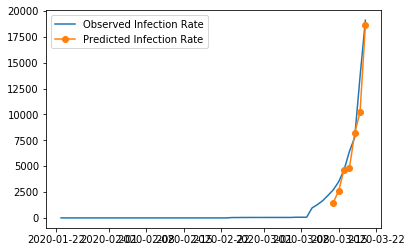

In [87]:
date1 = '2020-01-23'
date2 = '2020-03-20'
datelist = pd.date_range(date1, date2)
projectlist=pd.date_range('2020-03-14', '2020-03-20')
plt.plot(datelist,target_plt['US'],label = "Observed Infection Rate")
plt.plot(projectlist,Val_predict,marker='o',label = "Predicted Infection Rate")
plt.legend(loc="upper left")
